# EDA

In [1]:
# %pip install -r requirements.txt

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Read data

Some notes on the weather data:  
`QV2M` - Specific humidity at 2 meters  
`T2M` - Temperature at 2 meters  
`T2MWET` - Wet bulb temeprature at 2 meters  
`WS2M` - Wind speed at 2 meters  
`ALLSKY_SFC_UV_INDEX` - All sky surface UV index  
`T2MDEW` - Dew/frost point at 2 meters  
`TS` - Earth skin temperature  
`ALLSKY_SFC_UVB` - All sky surface UVB irradiance  
`T2M_RANGE` - Temperature at 2 meters range  
`RH2M` - Relative humidity at 2 meters  
`CLRSKY_SFC_SW_DWN` - Clear sky surface shortwave downward irradiance  

In [2]:
PATH = './weather_data/'
weather = pd.DataFrame()
files = os.listdir(PATH)

# Read each file
for file in files:
    weather = pd.concat([weather, pd.read_csv(PATH + file)])

# Check that expected matches actual
weather.reset_index(inplace=True)
expected_row_count = 2808 * weather['YYYYMMDD'].nunique() # Num of pulls/day * num of days
weather['YYYYMMDD'] = pd.to_datetime(weather['YYYYMMDD'], format='ISO8601')
weather = weather.drop(columns=['index'])
print(f'Read {len(files)} files | Expected {expected_row_count} rows')
print(f'Shape: {weather.shape}')
weather.head()

Read 695 files | Expected 1959984 rows
Shape: (1959984, 19)


,LON,LAT,YEAR,MM,DD,DOY,YYYYMMDD,QV2M,T2M,T2MWET,WS2M,ALLSKY_SFC_UV_INDEX,T2MDEW,TS,ALLSKY_SFC_UVB,ALLSKY_SFC_UVA,T2M_RANGE,RH2M,CLRSKY_SFC_SW_DWN
0,-97.697313,30.251707,2001,3,7,66,2001-03-07,6.96,13.29,10.9,1.43,1.61,8.51,13.29,0.31,12.42,14.38,75.75,5.97
1,-97.672401,30.328069,2001,3,7,66,2001-03-07,6.96,13.29,10.9,1.43,1.61,8.51,13.29,0.31,12.42,14.38,75.75,5.97
2,-97.721013,30.236494,2001,3,7,66,2001-03-07,7.69,13.89,11.9,1.39,1.61,9.91,13.94,0.31,12.42,14.11,79.69,5.97
3,-97.719236,30.373732,2001,3,7,66,2001-03-07,6.96,13.29,10.9,1.43,1.61,8.51,13.29,0.31,12.42,14.38,75.75,5.97
4,-97.740475,30.279196,2001,3,7,66,2001-03-07,6.96,13.29,10.9,1.43,1.61,8.51,13.29,0.31,12.42,14.38,75.75,5.97


## Basic EDA

Checking dtypes, missing values, summary statistics

In [3]:
weather.dtypes

LON                           float64
LAT                           float64
YEAR                            int64
MM                              int64
DD                              int64
DOY                             int64
YYYYMMDD               datetime64[ns]
QV2M                          float64
T2M                           float64
T2MWET                        float64
WS2M                          float64
ALLSKY_SFC_UV_INDEX           float64
T2MDEW                        float64
TS                            float64
ALLSKY_SFC_UVB                float64
ALLSKY_SFC_UVA                float64
T2M_RANGE                     float64
RH2M                          float64
CLRSKY_SFC_SW_DWN             float64
dtype: object

In [4]:
weather.isnull().sum()

LON                         0
LAT                         0
YEAR                        0
MM                          0
DD                          0
DOY                         0
YYYYMMDD                    0
QV2M                        0
T2M                         0
T2MWET                      0
WS2M                        0
ALLSKY_SFC_UV_INDEX    106704
T2MDEW                      0
TS                          0
ALLSKY_SFC_UVB          47736
ALLSKY_SFC_UVA          47736
T2M_RANGE                   0
RH2M                        0
CLRSKY_SFC_SW_DWN       36504
dtype: int64

In [3]:
# Low proportion of NA values, impute with median for now
weather = weather.fillna(weather.median())

In [7]:
# No need to look at some columns
weather.drop(columns=['LON', 'LAT', 'YEAR', 'MM', 'DD', 'DOY', 'YYYYMMDD']).describe() # Drop geo/date-related cols

,QV2M,T2M,T2MWET,WS2M,ALLSKY_SFC_UV_INDEX,T2MDEW,TS,ALLSKY_SFC_UVB,ALLSKY_SFC_UVA,T2M_RANGE,RH2M,CLRSKY_SFC_SW_DWN
count,1.959984e+06,1.959984e+06,1.959984e+06,1.959984e+06,1.959984e+06,1.959984e+06,1.959984e+06,1.959984e+06,1.959984e+06,1.959984e+06,1.959984e+06,1.959984e+06
mean,1.319838e+01,2.522583e+01,2.125113e+01,2.877898e+00,1.976805e+00,1.727725e+01,2.618210e+01,3.892980e-01,1.514562e+01,1.250500e+01,6.658145e+01,7.238052e+00
std,3.839927e+00,5.571932e+00,5.227139e+00,1.082681e+00,5.496257e-01,5.660760e+00,6.107838e+00,1.057025e-01,3.853643e+00,3.473645e+00,1.355132e+01,7.091053e-01
min,2.690000e+00,5.440000e+00,1.270000e+00,7.700000e-01,2.600000e-01,-5.050000e+00,5.390000e+00,5.000000e-02,2.320000e+00,2.630000e+00,1.744000e+01,5.090000e+00
25%,1.074000e+01,2.199000e+01,1.855000e+01,2.010000e+00,1.630000e+00,1.480000e+01,2.240000e+01,3.200000e-01,1.316000e+01,1.009000e+01,5.688000e+01,6.730000e+00
50%,1.404000e+01,2.633000e+01,2.326000e+01,2.730000e+00,2.015000e+00,1.905000e+01,2.690000e+01,4.000000e-01,1.580000e+01,1.277000e+01,6.669000e+01,7.330000e+00
75%,1.605000e+01,2.937000e+01,2.512000e+01,3.580000e+00,2.380000e+00,2.127000e+01,3.088000e+01,4.700000e-01,1.812000e+01,1.484000e+01,7.744000e+01,7.820000e+00
max,2.148000e+01,3.514000e+01,2.776000e+01,7.160000e+00,3.480000e+00,2.606000e+01,3.812000e+01,6.400000e-01,2.204000e+01,2.388000e+01,9.581000e+01,8.860000e+00


<AxesSubplot: >

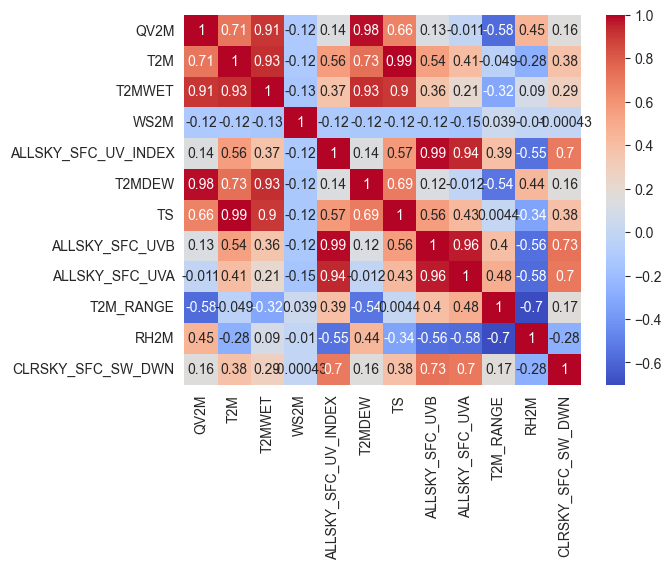

In [8]:
corr = weather.drop(columns=['LON', 'LAT', 'YEAR', 'MM', 'DD', 'DOY', 'YYYYMMDD']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

C:\Users\Victor Nguyen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Victor Nguyen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Victor Nguyen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Victor Nguyen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn

<Figure size 1000x600 with 0 Axes>

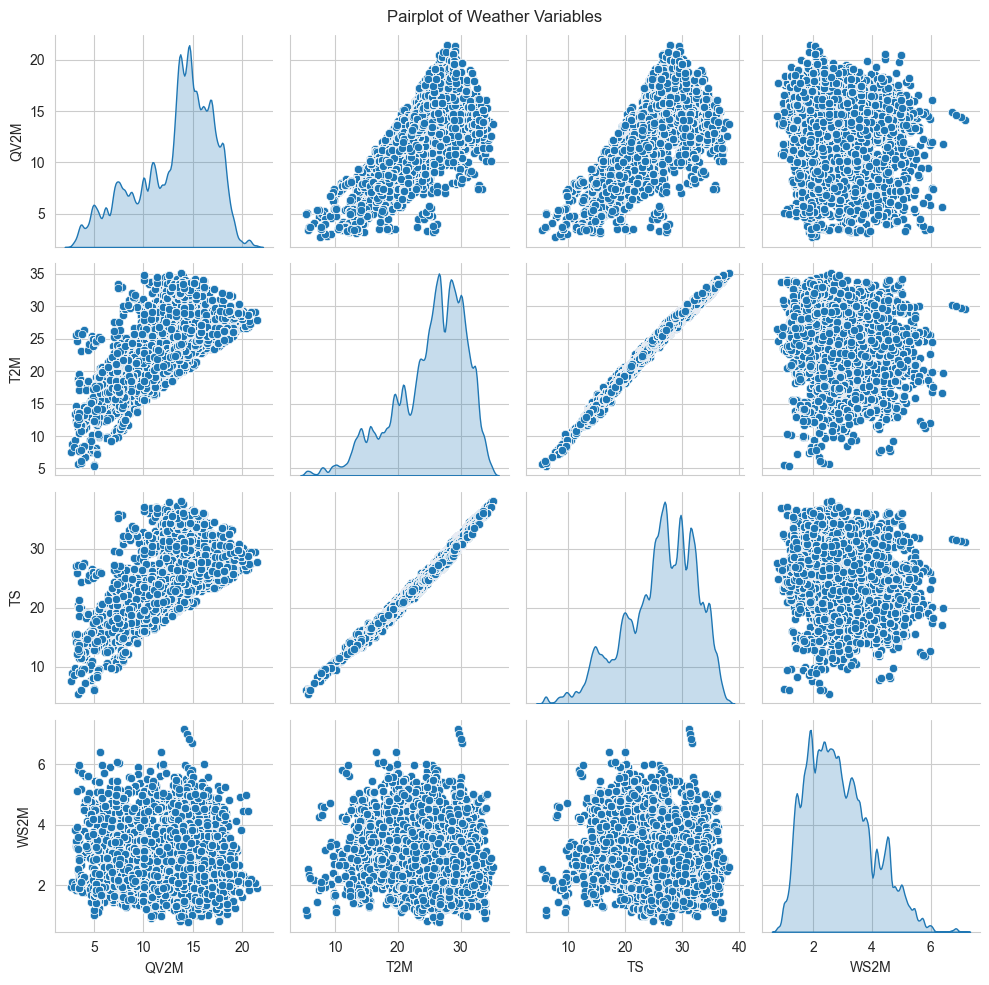

In [9]:
plt.figure(figsize=(10, 6))
p = sns.pairplot(weather[['QV2M', 'T2M', 'TS', 'WS2M']], diag_kind='kde')
p.fig.suptitle('Pairplot of Weather Variables')
plt.tight_layout()
plt.show()

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from collections import Counter

# Dictionary to store the occurrences of component counts
component_occurrences = Counter()

components_per_date = {}
filtered_components_per_date = {}
explained_variance_threshold = 0.95

for date, group in weather.groupby('YYYYMMDD'):
    # Drop date and location cols
    features = group.drop(columns=['LON', 'LAT', 'YEAR', 'MM', 'DD', 'DOY', 'YYYYMMDD'])
    
    # Standardize
    scaler = StandardScaler()
    standardized_features = scaler.fit_transform(features)
    
    # Do PCA
    pca = PCA()
    pca.fit(standardized_features)

    # Get number of components for 95% variance
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    num_components = np.argmax(cumulative_variance >= explained_variance_threshold) + 1
    components_per_date[date] = num_components
    
    # Update occurrences of the component count
    component_occurrences[num_components] += 1

# Display the occurrences of each component count
print("Occurrences of Component Counts for 95% Variance Retention:")
for num_components, count in component_occurrences.items():
    print(f"{num_components} components: {count} occurrences")

Occurrences of Component Counts for 95% Variance Retention:
2 components: 628 occurrences
3 components: 60 occurrences
1 components: 10 occurrences


In [11]:

# Calculate Procrustes distances between PCA loadings of each date pair with filtered data
procrustes_filtered_results = []

filtered_dates = list(filtered_components_per_date.keys())
for i in range(len(filtered_dates)):
    for j in range(i + 1, len(filtered_dates)):
        date1, date2 = filtered_dates[i], filtered_dates[j]
        loadings1 = filtered_components_per_date[date1]
        loadings2 = filtered_components_per_date[date2]
        
        # Check if the loadings have the same shape (which should be the case now)
        if loadings1.shape == loadings2.shape:
            _, _, disparity = procrustes(loadings1, loadings2)
            procrustes_filtered_results.append((date1, date2, disparity))

# Convert results to a DataFrame for inspection
procrustes_filtered_df = pd.DataFrame(procrustes_filtered_results, columns=['Date1', 'Date2', 'Procrustes_Disparity'])

procrustes_filtered_df.head()

,Date1,Date2,Procrustes_Disparity


In [12]:
# Drop date and location cols
features = weather.drop(columns=['LON', 'LAT', 'YEAR', 'MM', 'DD', 'DOY', 'YYYYMMDD'])

# Standardize
scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)

# Do PCA
pca = PCA()
pca.fit(standardized_features)

# Get number of components for 95% variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= explained_variance_threshold) + 1
num_components
# Print variance per component in a pritn statement
print(f'Number of components for 95% variance: {num_components}')
print('Variance per component:')
print(pca.explained_variance_ratio_)

Number of components for 95% variance: 5
Variance per component:
[4.57646562e-01 3.20315129e-01 8.37338351e-02 8.01414147e-02
 2.73223107e-02 2.40526774e-02 3.52632055e-03 1.86719817e-03
 6.65061850e-04 4.92071919e-04 2.37379842e-04 3.86237639e-08]


# PIVOT

In [13]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Drop date and location columns
features = weather[['T2M', 'WS2M', 'CLRSKY_SFC_SW_DWN', 'QV2M']]

# Standardize the features (important for VIF calculation accuracy)
scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)

# Convert back to DataFrame for ease of use
standardized_df = pd.DataFrame(standardized_features, columns=features.columns)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = standardized_df.columns
vif_data['VIF'] = [variance_inflation_factor(standardized_df.values, i) for i in range(standardized_df.shape[1])]

# Display the VIF values
print(vif_data.sort_values(by='VIF', ascending=False))

             Feature       VIF
0                T2M  2.358334
3               QV2M  2.073288
2  CLRSKY_SFC_SW_DWN  1.200208
1               WS2M  1.019243


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


weather2 = weather.drop(columns=['LON', 'LAT', 'YEAR', 'MM', 'DD', 'DOY', 'YYYYMMDD'])

X = weather2.drop(columns=['T2M'])
y = np.ravel(weather2[['T2M']])

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=2)

# Train the model
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

                Feature  Importance
5                    TS    0.994390
1                T2MWET    0.002805
8             T2M_RANGE    0.000537
2                  WS2M    0.000471
9                  RH2M    0.000461
3   ALLSKY_SFC_UV_INDEX    0.000340
10    CLRSKY_SFC_SW_DWN    0.000335
7        ALLSKY_SFC_UVA    0.000257
6        ALLSKY_SFC_UVB    0.000175
0                  QV2M    0.000125
4                T2MDEW    0.000104


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import HDBSCAN, DBSCAN
from sklearn.pipeline import make_pipeline

weather_2024_09_25 = weather[weather['YYYYMMDD'] == '2024-09-25'].copy(deep=True)

hdbscan_model = HDBSCAN(min_cluster_size=10)
dbscan_model = DBSCAN()
pipeline = make_pipeline(StandardScaler(), hdbscan_model)
# pipeline = make_pipeline(StandardScaler(), dbscan_model)
# pipeline.fit(weather_2024_09_25.drop(columns=['YEAR', 'MM', 'DD', 'DOY', 'YYYYMMDD']))
pipeline.fit(weather_2024_09_25[['T2M', 'WS2M', 'CLRSKY_SFC_SW_DWN', 'QV2M']])
weather_2024_09_25['cluster'] = hdbscan_model.labels_

In [5]:
business_trees_1km = pd.read_csv('business_trees_1km.csv')
business_trees_1km.head()

,Unnamed: 0,Reported.Year,Property.ID..,Commercial.Property..Property.Street.Address,Building.Name,Total.SqFt,Category,Year.Built,kWh.sqft,Percentile.Rank,...,Site.EUI..kBTU.sqft.,Portfolio.Manager.SqFt,Total.Green.House.Gas.Emissions..MtCO2e.,Portfolio.Manager.Organization,GeoLocation,Submitted.Name.of.Organization,GeoLocation_clean,lat,long,NearbyTreeSpecies
0,1,2017.0,187746,"5126 E 5 ST, AUSTIN TX,","5126 E 5 ST, AUSTIN TX,",7419.0,NaN,1940,0.000,NaN,...,NaN,NaN,NaN,NaN,"5126 E 5 ST\r\nAUSTIN, TX\r\n(30.251707, -97.6...","Pantur, Inc.","30.251707, -97.697313",30.251707,-97.697313,"Willow, Oak, Hackberry, Mesquite, Oak, Oak, Ha..."
1,2,2017.0,230740,"2500 RIDGEPOINT DR, AUSTIN TX, 78728","2500 RIDGEPOINT DR, AUSTIN TX, 78728",49024.0,INDUSTRIAL (W/sqft > 3),1983,15.580,39.58,...,NaN,NaN,NaN,NaN,"2500 RIDGEPOINT DR\r\nAUSTIN, TX 78728\r\n(30....",Equitable Commercial Realty,"30.328069, -97.672401",30.328069,-97.672401,Oak
2,3,2017.0,729528,"1700 S PLEASANT VALLEY RD, AUSTIN TX, 78741","1700 S PLEASANT VALLEY RD, AUSTIN TX, 78741",101953.0,STORE\GROCERY (W/sqft > 5),2009,32.063,76.26,...,NaN,NaN,NaN,NaN,"1700 S PLEASANT VALLEY RD\r\nAUSTIN, TX 78741\...","Mimco, Inc.","30.236494, -97.721013",30.236494,-97.721013,"Crape Myrtle, Oak, Oak, Crape Myrtle, Crape My..."
3,5,2017.0,526381,2011 W RUNDBERG LN Austin TX 78758,2011 W RUNDBERG LN Austin TX 78758,146142.0,OFFICE LG > 35000,1999,8.049,4.79,...,NaN,NaN,NaN,NaN,"2011 W RUNDBERG LN\r\nAustin, TX 78758\r\n(30....",AISD,"30.373732, -97.719236",30.373732,-97.719236,"Oak, Oak, Pecan, Pecan, Sycamore, Pear, Pear, ..."
4,6,2017.0,200001,"202 W 17 ST, AUSTIN TX, 78701","202 W 17 ST, AUSTIN TX, 78701",15350.0,OFFICE MED 10-35,1998,100.129,NaN,...,NaN,NaN,NaN,NaN,"202 W 17 ST\r\nAUSTIN, TX 78701\r\n(30.279196,...",Charter Communications,"30.279196, -97.740475",30.279196,-97.740475,"Pecan, Oak, Crape Myrtle, Crape Myrtle, Pecan,..."


In [6]:
# Add to whole data because clusters don't change much for different dates
location_to_cluster = weather_2024_09_25.set_index(['LAT', 'LON'])['cluster'].to_dict()
business_trees_1km['cluster'] = business_trees_1km.set_index(['lat', 'long']).index.map(location_to_cluster)
business_trees_1km.to_csv('business_trees_1km_with_weather_clusters.csv', index=False)

In [7]:
check = pd.read_csv('business_trees_1km_with_weather_clusters.csv')
check['cluster'].value_counts()

cluster
2    1964
1     641
3     155
0      48
Name: count, dtype: int64

In [8]:
weather_2024_09_25['cluster'].value_counts()

cluster
2    1964
1     641
3     155
0      48
Name: count, dtype: int64

In [9]:
check.head()

,Unnamed: 0,Reported.Year,Property.ID..,Commercial.Property..Property.Street.Address,Building.Name,Total.SqFt,Category,Year.Built,kWh.sqft,Percentile.Rank,...,Portfolio.Manager.SqFt,Total.Green.House.Gas.Emissions..MtCO2e.,Portfolio.Manager.Organization,GeoLocation,Submitted.Name.of.Organization,GeoLocation_clean,lat,long,NearbyTreeSpecies,cluster
0,1,2017.0,187746,"5126 E 5 ST, AUSTIN TX,","5126 E 5 ST, AUSTIN TX,",7419.0,NaN,1940,0.000,NaN,...,NaN,NaN,NaN,"5126 E 5 ST\r\nAUSTIN, TX\r\n(30.251707, -97.6...","Pantur, Inc.","30.251707, -97.697313",30.251707,-97.697313,"Willow, Oak, Hackberry, Mesquite, Oak, Oak, Ha...",2
1,2,2017.0,230740,"2500 RIDGEPOINT DR, AUSTIN TX, 78728","2500 RIDGEPOINT DR, AUSTIN TX, 78728",49024.0,INDUSTRIAL (W/sqft > 3),1983,15.580,39.58,...,NaN,NaN,NaN,"2500 RIDGEPOINT DR\r\nAUSTIN, TX 78728\r\n(30....",Equitable Commercial Realty,"30.328069, -97.672401",30.328069,-97.672401,Oak,2
2,3,2017.0,729528,"1700 S PLEASANT VALLEY RD, AUSTIN TX, 78741","1700 S PLEASANT VALLEY RD, AUSTIN TX, 78741",101953.0,STORE\GROCERY (W/sqft > 5),2009,32.063,76.26,...,NaN,NaN,NaN,"1700 S PLEASANT VALLEY RD\r\nAUSTIN, TX 78741\...","Mimco, Inc.","30.236494, -97.721013",30.236494,-97.721013,"Crape Myrtle, Oak, Oak, Crape Myrtle, Crape My...",1
3,5,2017.0,526381,2011 W RUNDBERG LN Austin TX 78758,2011 W RUNDBERG LN Austin TX 78758,146142.0,OFFICE LG > 35000,1999,8.049,4.79,...,NaN,NaN,NaN,"2011 W RUNDBERG LN\r\nAustin, TX 78758\r\n(30....",AISD,"30.373732, -97.719236",30.373732,-97.719236,"Oak, Oak, Pecan, Pecan, Sycamore, Pear, Pear, ...",2
4,6,2017.0,200001,"202 W 17 ST, AUSTIN TX, 78701","202 W 17 ST, AUSTIN TX, 78701",15350.0,OFFICE MED 10-35,1998,100.129,NaN,...,NaN,NaN,NaN,"202 W 17 ST\r\nAUSTIN, TX 78701\r\n(30.279196,...",Charter Communications,"30.279196, -97.740475",30.279196,-97.740475,"Pecan, Oak, Crape Myrtle, Crape Myrtle, Pecan,...",2


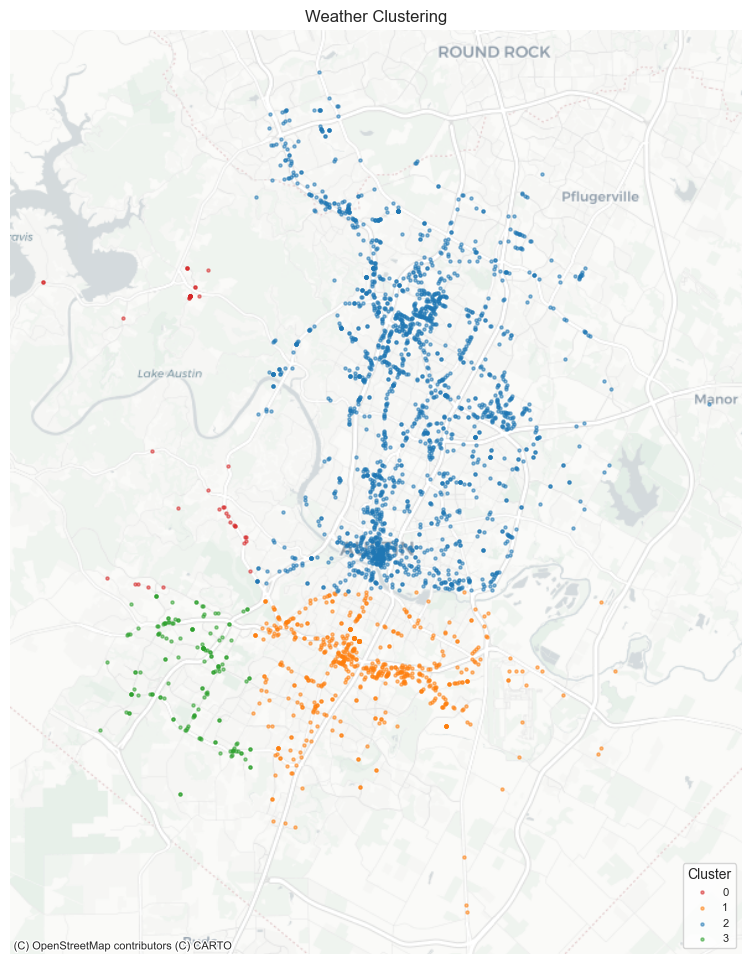

In [5]:
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

# Create geometry column with Point objects
weather_2024_09_25['geometry'] = weather_2024_09_25.apply(lambda row: Point(row['LON'], row['LAT']), axis=1)
gdf = gpd.GeoDataFrame(weather_2024_09_25, geometry='geometry', crs="EPSG:4326")
gdf = gdf.to_crs("EPSG:3857")

clusters = gdf['cluster'].unique()

# Step 3: Assign a color map
color_map = {cluster: plt.cm.get_cmap('tab10')(i) for i, cluster in enumerate(clusters)}  # Assign colors

fig, ax = plt.subplots(figsize=(12, 12))

for cluster in sorted(clusters):
    color = color_map[cluster]
    subset = gdf[gdf['cluster'] == cluster]  # Subset of the data for each species
    subset.plot(ax=ax, marker='o', color=color, markersize=5, label=cluster, alpha=0.5)


ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_axis_off()
ax.grid(False)

plt.legend(loc='lower right', title="Cluster", fontsize=8, title_fontsize=10)
plt.title('Weather Clustering')

plt.savefig('./plots/hdbscan.png', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import HDBSCAN
from sklearn.pipeline import make_pipeline
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
import imageio
import os

plt.ioff()

def make_plot(date):
    weather_date = weather[weather['YYYYMMDD'] == date].copy(deep=True)
    # print(weather_date)
    print(weather_date['YYYYMMDD'].iloc[0])
    hdbscan_model = HDBSCAN(min_cluster_size=10)
    pipeline = make_pipeline(StandardScaler(), hdbscan_model)
    # pipeline.fit(weather_date.drop(columns=['YEAR', 'MM', 'DD', 'DOY', 'YYYYMMDD']))
    pipeline.fit(weather_date[['T2M', 'WS2M', 'CLRSKY_SFC_SW_DWN', 'QV2M']])
    weather_date['cluster'] = hdbscan_model.labels_

    # Create geometry column with Point objects
    weather_date['geometry'] = weather_date.apply(lambda row: Point(row['LON'], row['LAT']), axis=1)
    gdf = gpd.GeoDataFrame(weather_date, geometry='geometry', crs="EPSG:4326")
    gdf = gdf.to_crs("EPSG:3857")

    clusters = gdf['cluster'].unique()

    # Step 3: Assign a color map
    color_map = {cluster: plt.cm.get_cmap('tab10')(i) for i, cluster in enumerate(clusters)}  # Assign colors

    fig, ax = plt.subplots(figsize=(12, 12))

    for cluster in sorted(clusters):
        color = color_map[cluster]
        subset = gdf[gdf['cluster'] == cluster]  # Subset of the data for each species
        subset.plot(ax=ax, marker='o', color=color, markersize=5, label=cluster, alpha=0.5)


    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
    ax.set_axis_off()
    ax.grid(False)

    plt.legend(loc='lower right', title="Cluster", fontsize=8, title_fontsize=10)

    plt.savefig(f'frames/frame_{date}.png', dpi=300, bbox_inches='tight')
    plt.close()


os.makedirs('frames', exist_ok=True)

dates = [str(td.date()) for td in sorted(weather['YYYYMMDD'].unique())]
for date in dates:
    make_plot(date)

# Get a list of frame files
frame_files = [f"frames/frame_{date}.png" for date in dates]
# Create and save the GIF
with imageio.get_writer("animated_map.gif", mode="I", duration=10) as writer:  # duration is time per frame
    for filename in frame_files:
        image = imageio.imread(filename)
        writer.append_data(image)

for filename in frame_files:
    os.remove(filename)

2001-03-07 00:00:00
2001-03-14 00:00:00
2001-03-21 00:00:00
2001-03-28 00:00:00
2002-03-06 00:00:00


KeyboardInterrupt: 

['2001-03-07',
 '2001-03-14',
 '2001-03-21',
 '2001-03-28',
 '2002-03-06',
 '2002-03-13',
 '2002-03-20',
 '2002-03-27',
 '2002-04-03',
 '2002-04-10',
 '2002-04-17',
 '2002-04-24',
 '2002-05-01',
 '2002-05-08',
 '2002-05-15',
 '2002-05-22',
 '2002-05-29',
 '2002-06-05',
 '2002-06-12',
 '2002-06-19',
 '2002-06-26',
 '2002-07-03',
 '2002-07-10',
 '2002-07-17',
 '2002-07-24',
 '2002-07-31',
 '2002-08-07',
 '2002-08-14',
 '2002-08-21',
 '2002-08-28',
 '2002-09-04',
 '2002-09-11',
 '2002-09-18',
 '2002-09-25',
 '2003-03-05',
 '2003-03-12',
 '2003-03-19',
 '2003-03-26',
 '2003-04-02',
 '2003-04-09',
 '2003-04-16',
 '2003-04-23',
 '2003-04-30',
 '2003-05-07',
 '2003-05-14',
 '2003-05-21',
 '2003-05-28',
 '2003-06-04',
 '2003-06-11',
 '2003-06-18',
 '2003-06-25',
 '2003-07-02',
 '2003-07-09',
 '2003-07-16',
 '2003-07-23',
 '2003-07-30',
 '2003-08-06',
 '2003-08-13',
 '2003-08-20',
 '2003-08-27',
 '2003-09-03',
 '2003-09-10',
 '2003-09-17',
 '2003-09-24',
 '2004-03-03',
 '2004-03-10',
 '2004-03-